In [1]:
%load_ext autoreload
%autoreload
%matplotlib inline

In [2]:
%run run_gnode_mixed_mnist.py

mode: GPU
{
  "resume": false, 
  "exp_name": "exp20_mixed_mnist", 
  "hyperparams": "hyperparams/mixed_mnist.py", 
  "weights": "iter", 
  "tensorboard": false, 
  "gpu": 1, 
  "delete": []
}
loading HP from file
importing hyperparams hyperparams.mixed_mnist


[exp20_mixed_mnist: run_gnode_mixed_mnist.py:  68] WARNING: <module>(): Deleting Logs...


[exp20_mixed_mnist: utils.py:  45] INFO: create_child_node(): Child Node node0 created from None


/data/project_skeleton/gan-tree/src/trainers


In [3]:
GNode.load('../experiments/exp20_mixed_mnist/best_node-10.pt', root)

<GNode[name=node0 id=0 parent_id=-1]>

In [4]:
tr.manual_seed(42)
if tr.cuda.is_available():
    tr.cuda.manual_seed_all(42)
X, L = dl.random_batch('train', 2018)

In [5]:
print X.shape, L.shape
digits = {i:[] for i in range(20)}
for x, l in zip(X, L):
    digits[l.item()].append(x[None, :, :, :])
for l in digits:
    digits[l] = tr.cat(digits[l])

torch.Size([2018, 1, 28, 28]) torch.Size([2018])


#### **Critic**

In [6]:
from models.images.classifier import MNISTCritic

In [7]:
critic = MNISTCritic(20)
critic.load_state_dict(tr.load('mnist_mix_clf_best.pt'))

In [8]:
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

In [9]:
f = tr.distributions.MultivariateNormal(tr.zeros(100), tr.eye(100))
tsne = TSNE(2)
pca50 = PCA(50)
pca2 = PCA(2)

In [10]:
def interpolate(z1, z2, steps):
    lsp = tr.linspace(0, 1, steps)[:, None]
    return z1 + lsp * (z2 - z1)

In [11]:
Z = root.gan.encode(X)
pca2.fit(Z)
pca50.fit(Z)
zt_ = tsne.fit_transform(pca50.transform(Z))

In [12]:
zp = pca.transform(Z)

NameError: name 'pca' is not defined

In [15]:
# zt_ = z_tsne.embedding_
# zt_ = pca.transform(Z)
zn = np.random.normal(0, 1, (2000, 100)).astype(np.float32)
xn = root.gan.decode(zn)
ln = critic.predict(tr.tensor(xn))
pn = critic.probs(tr.tensor(xn))
zp = tsne.fit_transform(pca50.transform(zn))
# plt.scatter(zp[:, 0], zp[:, 1], s=1, c=ln, cmap='viridis')

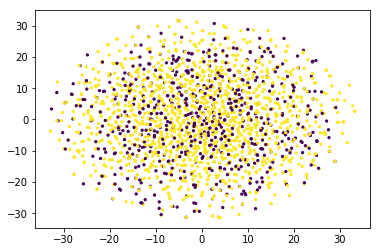

In [16]:
lab = (pn.max(axis=-1) > 0.9).astype(int)
plt.scatter(zp[:, 0], zp[:, 1], s=5, c=lab)

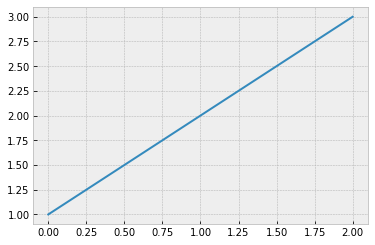

In [23]:
from matplotlib import gridspec
style.use(style.available[6])
plt.plot([1,2,3])

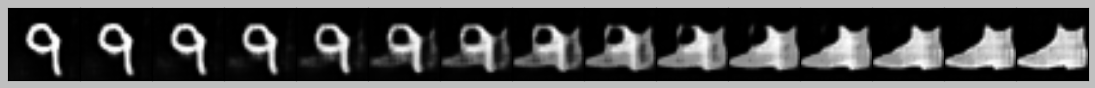

In [36]:
style.use(style.available[5])

d1 = 9
d2 = 19
steps = 45
n = 15

x1 = digits[d1]
x2 = digits[d2]

z1 = root.pre_gmm_encode(x1)
z2 = root.pre_gmm_encode(x2)

z_stream = interpolate(z1[10], z2[12], steps)
x_stream = root.gan.decode(z_stream)
z_rand = f.sample((100,))

probs = critic.probs(tr.tensor(x_stream))
x = x_stream
margin = 0.05

fig = plt.figure(figsize=(n, 1))
gs = gridspec.GridSpec(1, n, fig, hspace=0.0, wspace=0.0)
gs.update(bottom=margin, left=margin, top=1 - margin, right=1 - margin)
ax = fig.subplots(1, n)

for i in range(n):
    ax = plt.subplot(gs[i])
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.set_yticks([])
    ax.set_xticks([])
    ax.imshow(x[i*steps/n, 0])

fig.savefig('diagrams/mnist_mix_concept_%d%d' % (d1, d2))

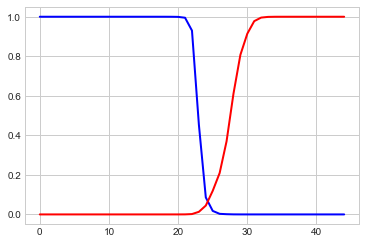

In [27]:
ax = plt.gca()
ax.plot(probs[:, d1], c='blue')
ax.plot(probs[:, d2], c='red')
ax.figure.savefig('diagrams/mnist_concept_probs_%d%d' % (d1, d2))

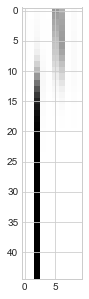

In [201]:
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(111)
ax.imshow(probs);

In [22]:
# print x1.shape
z1 = root.gan.encoder(tr.rand(12, 1, 28, 28))
print ''
z1 = root.gan.encoder(tr.rand(11, 1, 28, 28))

In [23]:
# x_rand = root.gan.decode(z1)